In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Define path
path = r'/Users/Shikongo/Healthcare Cost Analysis and Prediction/'

In [5]:
path

'/Users/Shikongo/Healthcare Cost Analysis and Prediction/'

In [8]:
df_insurance = pd.read_csv(r'/Users/Shikongo/Healthcare Cost Analysis and Prediction/Healthcare Clean Data/ Clean Data/insurance2.csv',index_col = False)

In [25]:
df_insurance.to_csv(os.path.join(path,'Healthcare Clean Data',' Clean Data','insurance_Unsupervised.csv'))

In [9]:
df_insurance.head()

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Age,Sex,BMI,Children,Smoker,Region,Charges
0,0,0,0,0,0,0,19,female,27.900,0,yes,southwest,$16884.924000
1,1,1,1,1,1,1,18,male,33.770,1,no,southeast,$1725.552300
2,2,2,2,2,2,2,28,male,33.000,3,no,southeast,$4449.462000
3,3,3,3,3,3,3,33,male,22.705,0,no,northwest,$21984.470610
4,4,4,4,4,4,4,32,male,28.880,0,no,northwest,$3866.855200


In [10]:
df_insurance['Charges'] = pd.to_numeric(df_insurance['Charges'].str.replace('$', '').str.replace(',', ''), errors='coerce')

/var/folders/wt/9ylmxnkx64q1nt52gjn4j_bw0000gp/T/ipykernel_71359/3646923699.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_insurance['Charges'] = pd.to_numeric(df_insurance['Charges'].str.replace('$', '').str.replace(',', ''), errors='coerce')


In [11]:
df_insurance.head()

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Age,Sex,BMI,Children,Smoker,Region,Charges
0,0,0,0,0,0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,1,1,1,1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,2,2,2,2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,3,3,3,3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,4,4,4,4,4,32,male,28.880,0,no,northwest,3866.85520


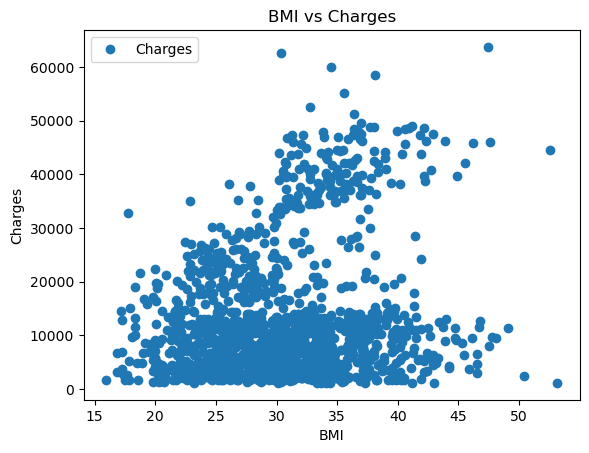

In [12]:
# Create a scatterplot using matplotlib for another look as how the chosen variables plot against each other. \n",
df_insurance.plot(x = 'BMI', y='Charges', style='o') # The style option creates a scatterplot; without it, we only have lines. \n",
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

1. Hypothesis Individuals with higher BMI values have higher healthcare charges, possibly due to obesity-related health problems.

In [13]:
# Reshape the variables into NumPY arrays and put them into separate objects. 

x = df_insurance['BMI'].values.reshape(-1,1)
y = df_insurance['Charges'].values.reshape(-1,1)

In [14]:
x

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [15]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [16]:
# Split data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [17]:
# To run the regression: use scikit-learn functions
# Create a regression object
regression = LinearRegression() # this is the regression object we will fit onto the training set

In [18]:
# Fit the regression object to the trainingin data for each variables/set
regression.fit(x_train, y_train)

LinearRegression()

In [19]:
# Predict the values of y and x and see how accurate they are.
y_predicted = regression.predict(x_test)

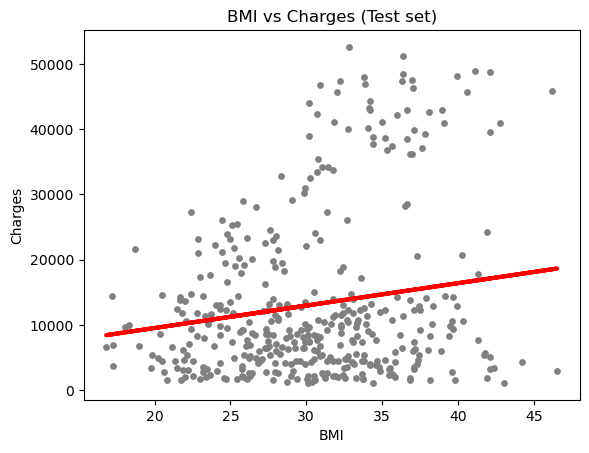

In [20]:
# Create a plot that show the regression line from the model on the test set. 
plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s =15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('BMI vs Charges (Test set)')
plot_test.xlabel('BMI')
plot_test.ylabel('Charges')
plot_test.show()

2. Write your own interpretation of how well the line appears to fit the data.

Although the red line indicates a higher average BMI corresponds to higher charges because the line goes up when the BMI is high, the red regression line doesn't perfectly cover all the data points. In the area where BMI is 40 to 45, there are still many data points that indicate low charges, whereas with a low BMI of 25, there are data points that indicate high charges. This contradicts my hypothesis."

In [21]:
# Creat objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [22]:
# Print the model summary statistics. This is where you evaluate the performance of the model. /n",

print('Slope:',regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[343.46869991]]
Mean squared error:  151291248.54352704
R2 score:  0.05128390291175877


In [23]:
# When found that data is not fit: (due to small % or small number)
# Do: Create a dataframe comparing the real and the predicted values of y. 
# The data below quite difference model and it is not doing a great jon of explaining
# relationship between the BMI and Charges,
df_insurance = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_insurance.head(30)

,Actual,Predicted
0,9724.53000,13043.195880
1,8547.69130,12758.116859
2,45702.02235,16603.248954
3,12950.07120,15852.769845
4,9644.25250,8870.051176
5,4500.33925,10012.084603
6,2198.18985,11708.819981
7,11436.73815,15167.549789
8,7537.16390,13046.630567
9,5425.02335,13340.296305


Slope: The slope value of approximately 343.47 indicates the relationship between the "Actual" and "Predicted" values. A slope significantly different from 1 would suggest a lack of linearity between the actual and predicted values.
Mean Squared Error (MSE): The MSE value of 151,291,248.54 is relatively high, indicating a substantial level of error between the predicted and actual values. A lower MSE is desirable, so this value suggests that the model's predictions have relatively large errors compared to the actual values.

R2 Score: The R-squared (R2) score of approximately 0.051 suggests that the model explains only a small fraction of the variance in the actual values. An R2 score close to 1 indicates a good fit, but a score of 0.051 indicates that the model's predictions do not explain much of the variation in the actual charges.

In summary, the metrics suggest that the model's predictions are not very close to the actual values. The model does not provide a good fit to the data, and there is a significant level of error in the predictions. It may be necessary to explore other models or improve the current model to achieve better predictive accuracy. Additionally, it's essential to investigate the data source and collection process for any potential biases or issues that might be affecting the model's performance.

In [24]:
df_insurance.to_csv(os.path.join(path,'Healthcare Clean Data',' Clean Data','insurance_Unsupervised.csv'))